In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

from tensorflow import keras

from IPython.display import clear_output

import Settings
import Preprocessing
import Sampling
import VideoAnalysis
import Visualize
import NeuralNetwork

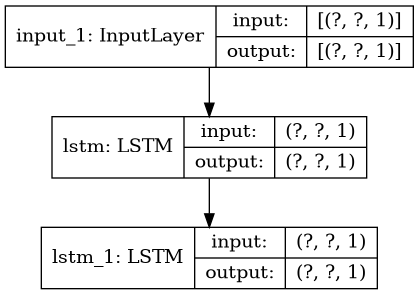

In [2]:
model = NeuralNetwork.initializeNet()
keras.utils.plot_model(model, 'NetworkTesting_images/network_layout.png', show_shapes=True)

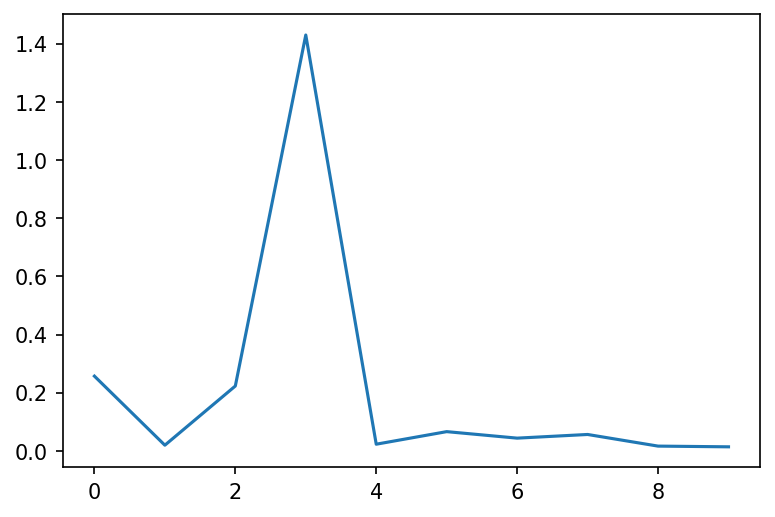

In [3]:
batchsize = 2

# Load our data files
dataFiles = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)

# There are some weird inconsistencies in the data files, so I am curating a few that I know work
# to test the network setup on
goodDataFiles = [12, 13, 15, 16, 17, 19, 20, 23, 24]
dataFiles = [dataFiles[i] for i in goodDataFiles]
#print(dataFiles)

propertyFiles = Preprocessing.loadRunData(dataFiles)
videos = Preprocessing.loadVideo(dataFiles)
matFiles = Preprocessing.loadMatFile(dataFiles)

trainingSteps = 10

error = np.zeros(trainingSteps)

for i in range(trainingSteps):
    sampleLength = 20
    samples = Sampling.randomSample(videos, propertyFiles, matFiles, VideoAnalysis.averageBrightness, interpolate=True, numSamples=batchsize, sampleLength=sampleLength)
    
    inputs = np.zeros([batchsize, sampleLength, 1])
    outputs = np.zeros([batchsize, sampleLength, 1])
    inputs[:,:,0], outputs[:,:,0] = samples[:,1,:], samples[:,2,:]
    
    error[i] = model.train_on_batch(inputs, outputs)[0]
    clear_output(wait=True)
    plt.plot(error)
    plt.show()

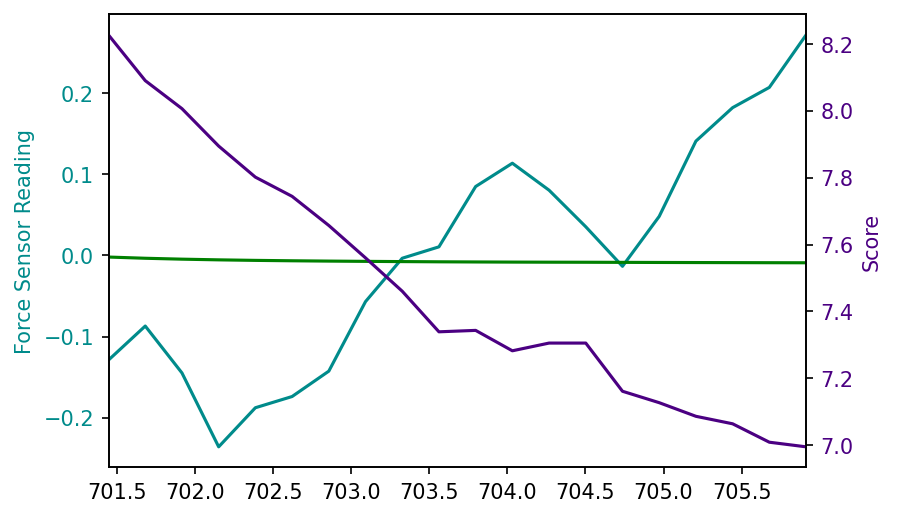

In [4]:
fig, ax1 = plt.subplots()
tArr, sArr, fArr, eArr = samples[0]

ax1Color = 'darkcyan'
ax1.plot(tArr, fArr, color=ax1Color)
inputArr = np.zeros([1, sampleLength, 1])
inputArr[0,:,:] = model(inputs)[0]
ax1.plot(tArr, inputArr[0], color='g')
ax1.set_ylabel('Force Sensor Reading', color=ax1Color)
ax1.tick_params(axis='y', labelcolor=ax1Color)

ax2Color = 'indigo'
ax2 = ax1.twinx()
ax2.plot(tArr, sArr, color=ax2Color)
ax2.tick_params(axis='y', labelcolor=ax2Color)
ax2.set_ylabel('Score', color=ax2Color)

ax1.set_xlim([tArr[0], tArr[-1]])

plt.show()

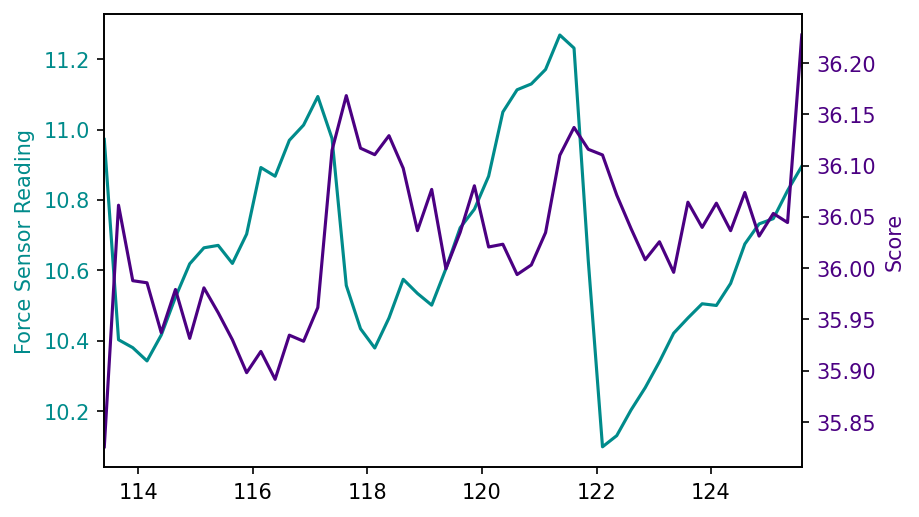

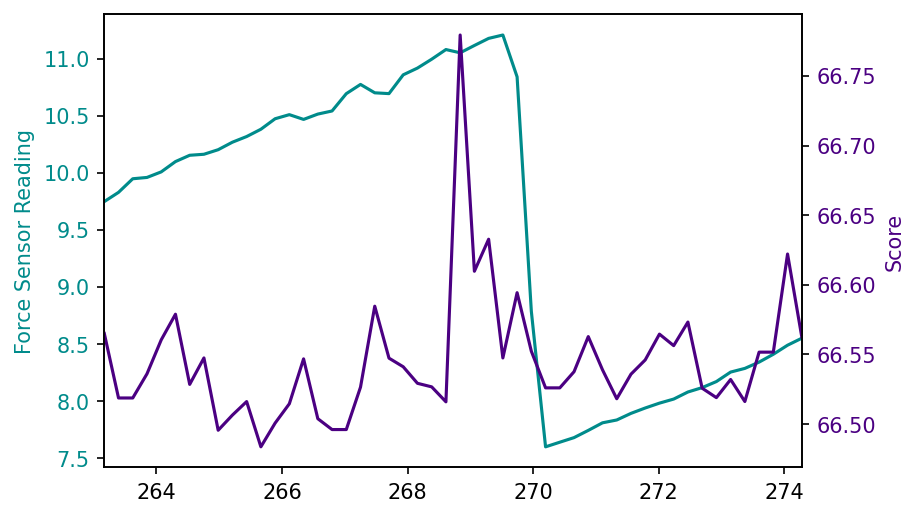

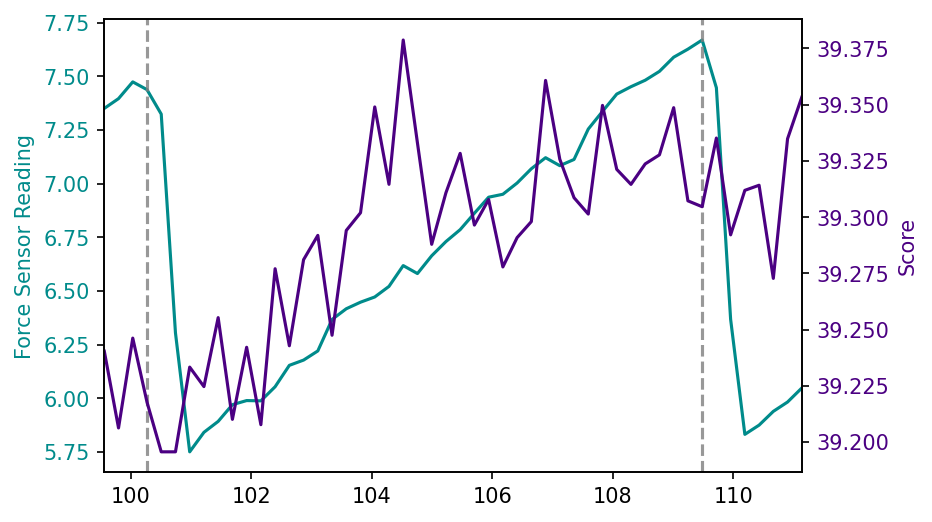

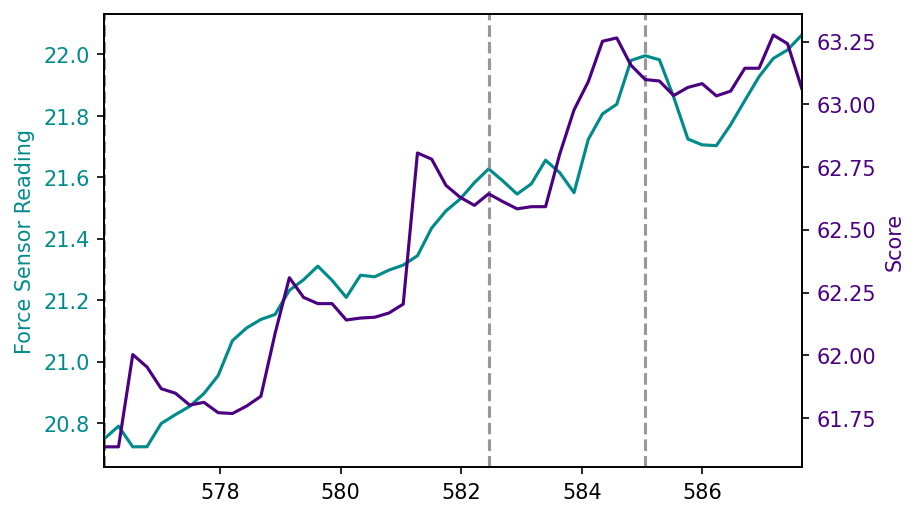

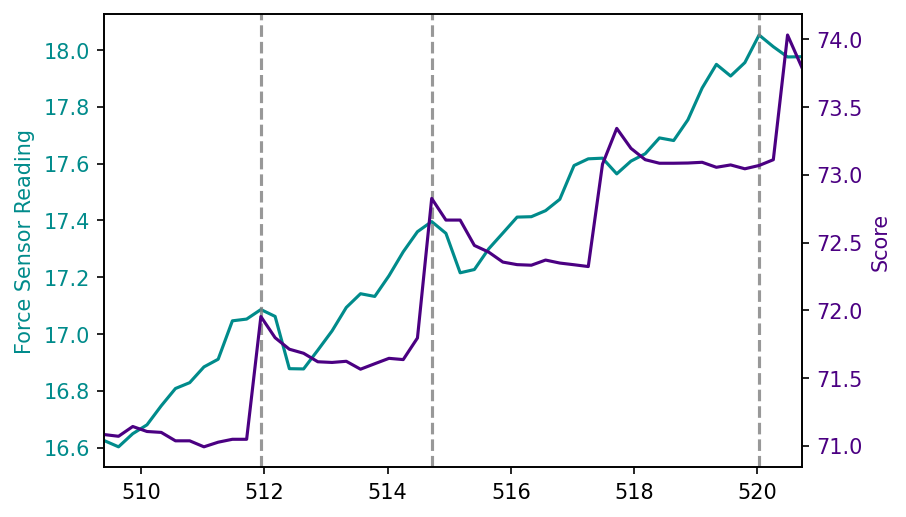

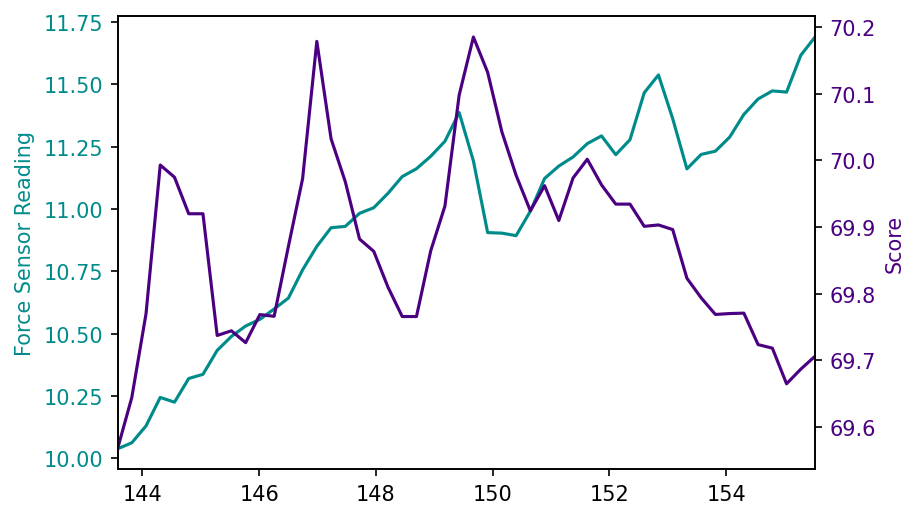

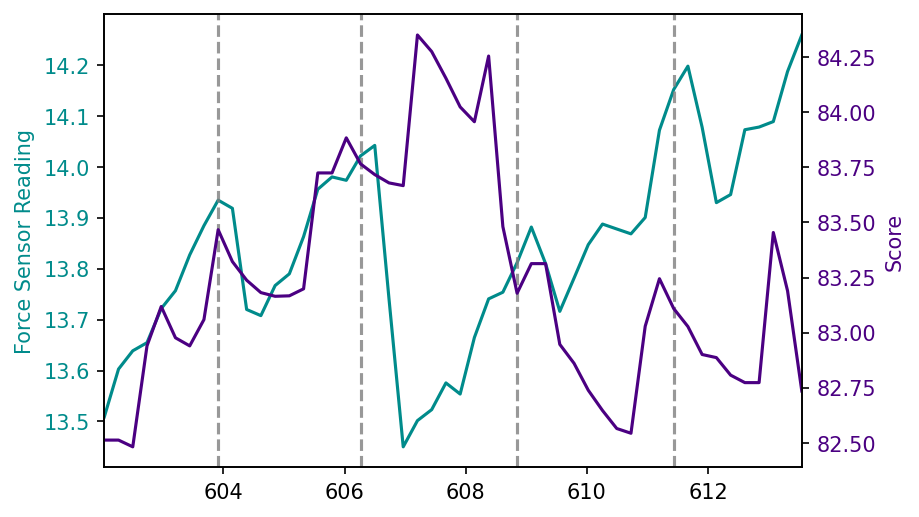

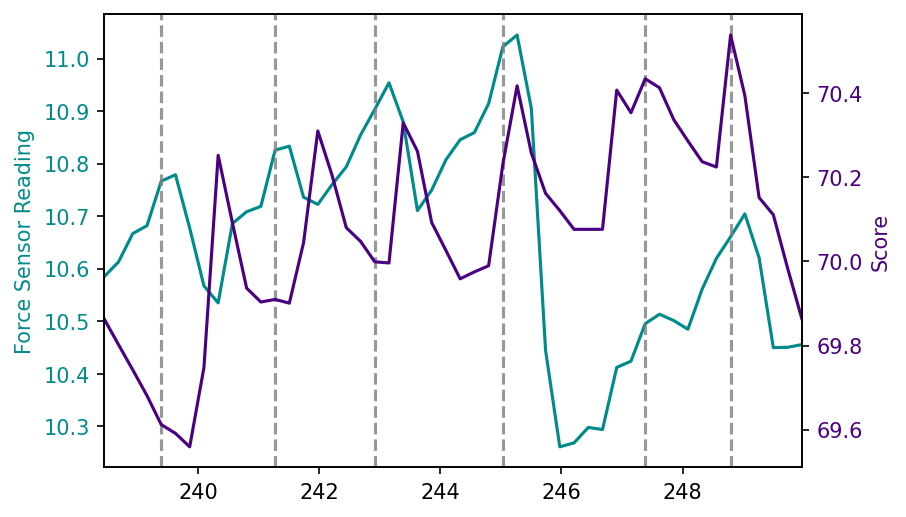

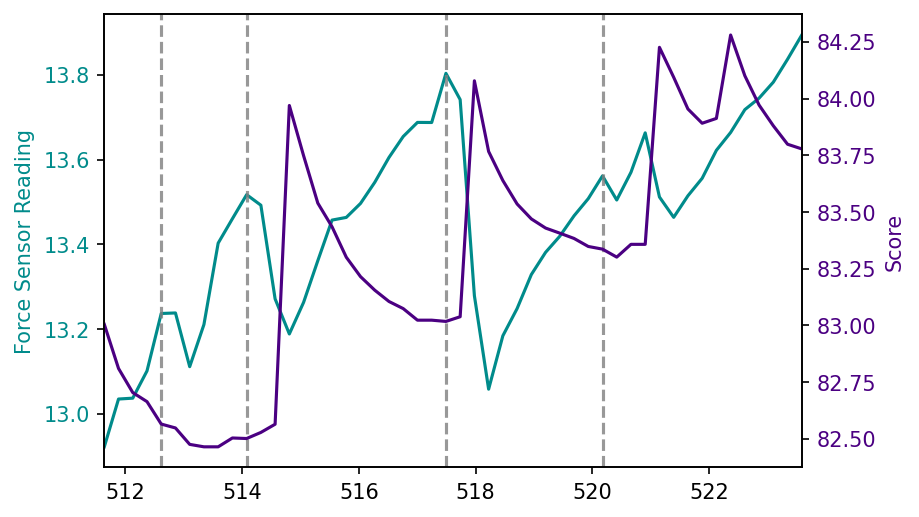

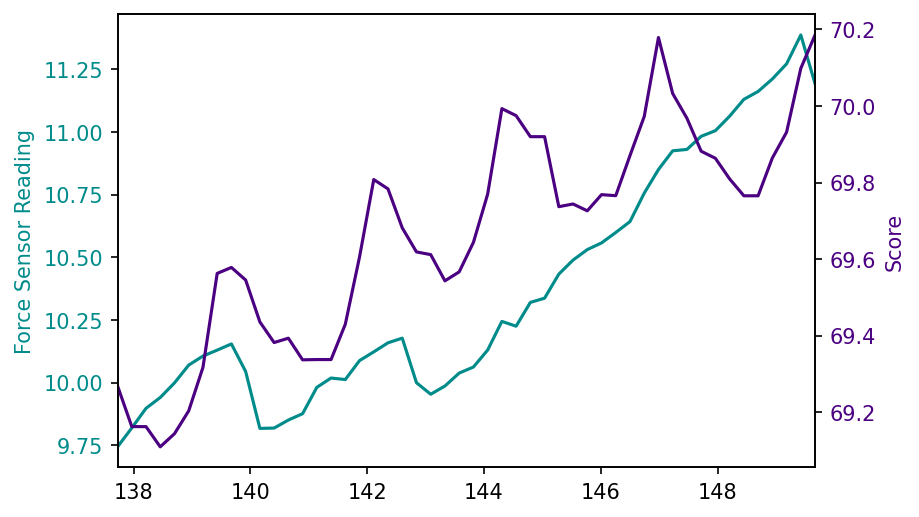

In [4]:
for i in range(len(samples)):
    Visualize.visualizeSample(sample=samples[i])

In [21]:
for i in range(len(matFiles)):
    tArr = VideoAnalysis.timeArr(videos[i], propertyFiles[i])
    avgTimeDiff = np.mean([tArr[i+1] - tArr[i] for i in range(len(tArr)-1)])
    print(f'{avgTimeDiff:8.5f}  |  {dataFiles[i]}')

 1.84593  |  070330b
 1.94817  |  070330c
 1.52406  |  070330d
 1.67751  |  070330e
 1.94186  |  070330f
 1.78286  |  070401a
 1.81100  |  070401b
 1.77966  |  070401c
 1.18785  |  070401d
 1.91979  |  070401e
 1.76812  |  070401f
 1.70270  |  070401g
 0.23613  |  070403a
 0.23089  |  070403b
 0.17666  |  070410a
 0.21398  |  070410b
 0.22673  |  070524b
 0.24858  |  070525a
 0.15023  |  070525b
 0.23022  |  070525c
 0.24712  |  070525d
 0.19180  |  070622a
 0.11904  |  070622b
 0.23502  |  070622c
 0.24375  |  070622d
